# Support Vector Regression (SVR)

## Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [64]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [65]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [66]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [67]:
y = y.reshape(len(y),1)
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

## Feature Scaling

In [68]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [69]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [70]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

## Training the SVR model on the whole dataset

In [71]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

/home/caio/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [73]:
y_pred = regressor.predict(sc.transform([[6.5]]))

y_pred = sc_y.inverse_transform([y_pred])
y_pred

array([[170370.0204065]])

In [79]:
pred = regressor.predict(X)

pred = sc_y.inverse_transform([pred])
pred.reshape(10,1)

array([[ 73474.15615697],
       [ 70786.94584626],
       [ 88213.00902103],
       [108254.98574956],
       [122574.52250599],
       [145503.10688572],
       [209410.23132923],
       [330606.89204569],
       [471671.95587315],
       [557821.75899897]])

## Visualising the SVR results

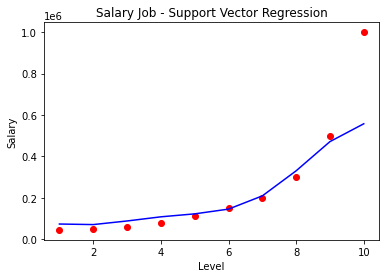

In [88]:
plt.scatter(sc.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(sc.inverse_transform(X), pred.reshape(10,1), color='blue')
plt.title('Salary Job - Support Vector Regression')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

In [89]:
pred1 = regressor.predict(sc_X.transform(X_grid))

pred1 = sc_y.inverse_transform([pred1])
pred1.reshape(90,1)

array([[ 73474.15615697],
       [ 71922.03659018],
       [ 70670.99294089],
       [ 69718.75598421],
       [ 69060.84136608],
       [ 68690.62180388],
       [ 68599.42348551],
       [ 68776.64490899],
       [ 69209.89612215],
       [ 69885.15610075],
       [ 70786.94584626],
       [ 71898.51469391],
       [ 73202.03729633],
       [ 74678.81878626],
       [ 76309.50571743],
       [ 78074.30052969],
       [ 79953.17747364],
       [ 81926.09815079],
       [ 83973.22506746],
       [ 86075.13185068],
       [ 88213.00902103],
       [ 90368.86444809],
       [ 92525.71781744],
       [ 94667.78860374],
       [ 96780.67716343],
       [ 98851.5386261 ],
       [100869.24927101],
       [102824.5650224 ],
       [104710.27158468],
       [106521.32556977],
       [108254.98574956],
       [109910.93330544],
       [111491.37965606],
       [113001.16013538],
       [114447.81148303],
       [115841.63081208],
       [117195.71345446],
       [118525.9668672 ],
       [1198

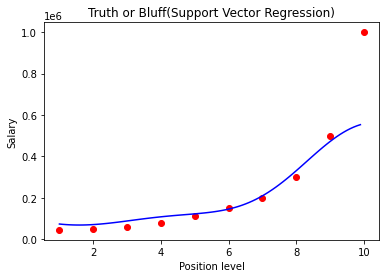

In [90]:
X_grid = np.arange(min(sc.inverse_transform(X)), max(sc.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(sc.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, pred1.reshape(90,1),color='blue')
plt.title('Truth or Bluff(Support Vector Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()